In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np

# Load the dataset
content_df = pd.read_csv('https://raw.githubusercontent.com/RakeshBH23/Netflix-Data-Analysis/main/Netflix-Data-Analysis.csv')


## 1. Data Overview & Missing Values

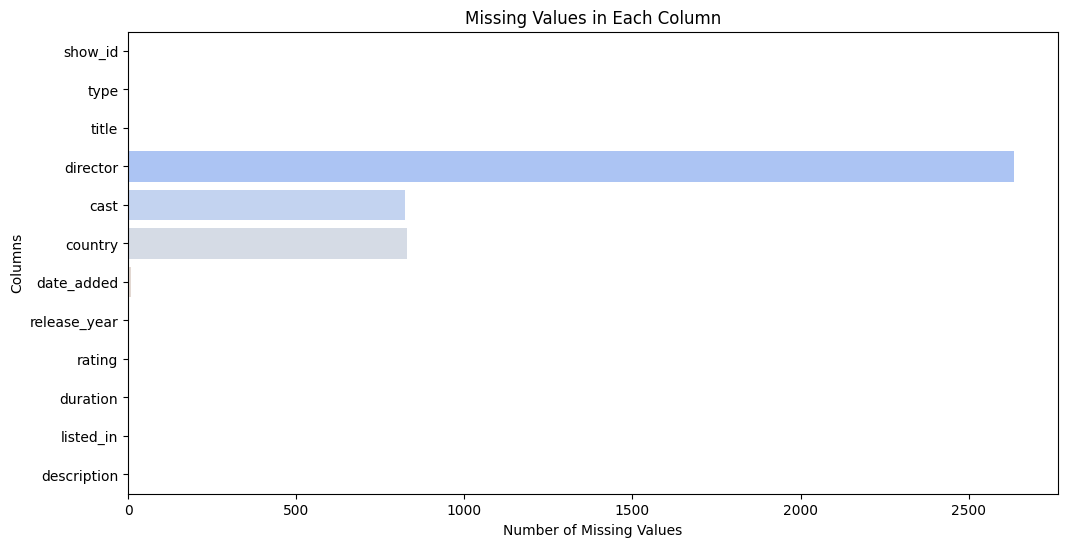

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_values.index, x=missing_values.values, hue=missing_values.index, dodge=False, legend=False, palette="coolwarm")
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values in Each Column')
plt.show()


## 2. Content Distribution

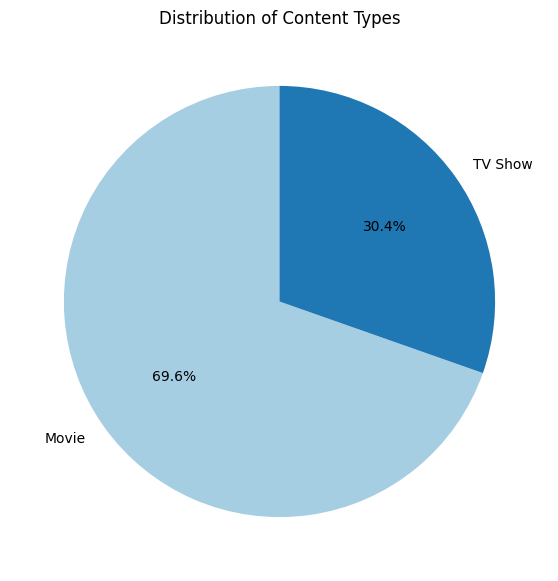

In [23]:
content_counts = content_df['type'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
plt.title('Distribution of Content Types')
plt.show()

## 3. Top Directors

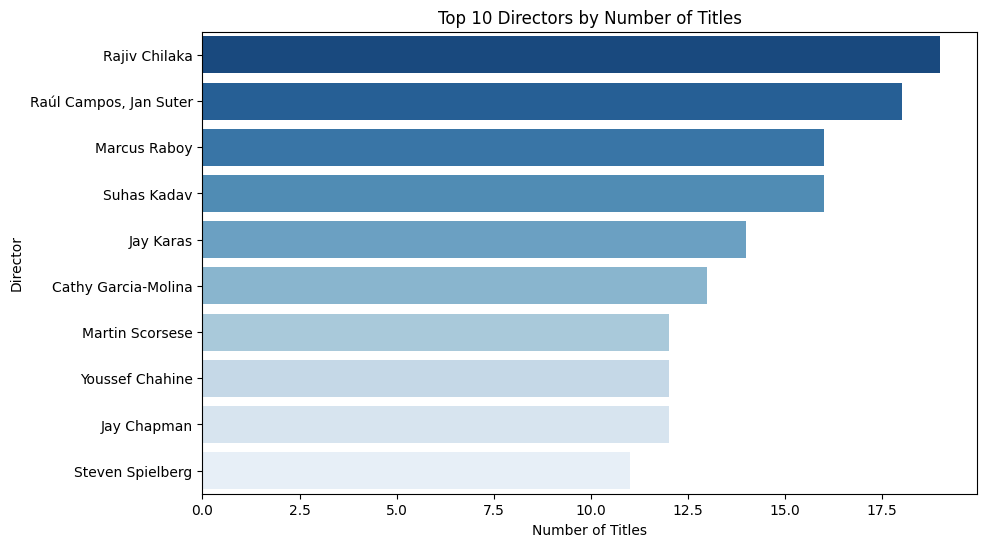

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_directors.index, x=top_directors.values, hue=top_directors.index, dodge=False, palette="Blues_r", legend=False)
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.title('Top 10 Directors by Number of Titles')
plt.show()


## 4. Cast Analysis

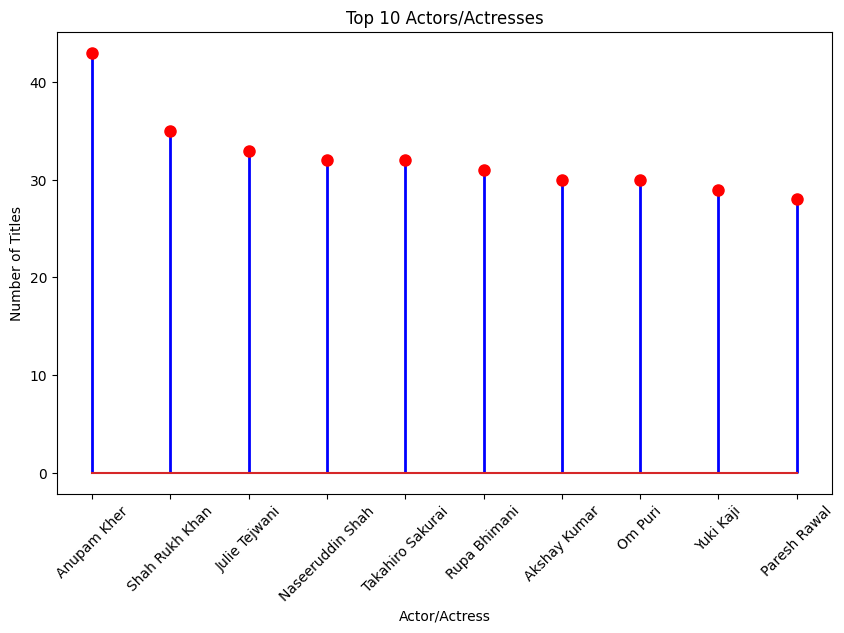

In [29]:
plt.figure(figsize=(10, 6))

# X positions for labels
x_positions = range(len(top_cast))

# Create the stem plot without the unsupported argument
markerline, stemline, baseline = plt.stem(x_positions, top_cast.values)
plt.setp(markerline, markersize=8, color="red")  # Customize marker
plt.setp(stemline, linewidth=2, color="blue")    # Customize lines

# Set x-axis labels
plt.xticks(x_positions, top_cast.index, rotation=45)

plt.xlabel('Actor/Actress')
plt.ylabel('Number of Titles')
plt.title('Top 10 Actors/Actresses')

plt.show()


## 5. Content by Country

In [33]:
import plotly.express as px

# Convert top_countries Series to DataFrame
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['country', 'titles']

# Create choropleth map with a different color scale
fig = px.choropleth(top_countries_df,
                    locations="country",
                    locationmode="country names",
                    color="titles",
                    title="Top 10 Countries by Number of Titles",
                    color_continuous_scale=px.colors.sequential.Plasma)  # Change color scale here

fig.show()


## 6. Release Year Distribution

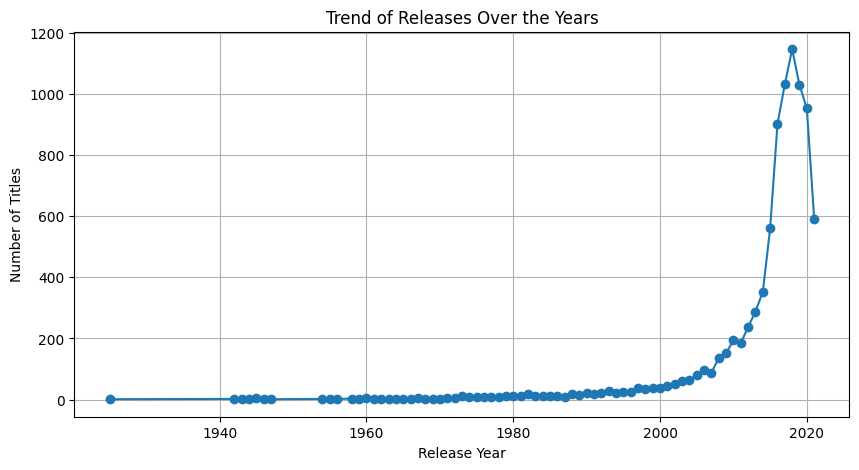

In [36]:
release_year_counts = content_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o', linestyle='-')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Trend of Releases Over the Years')
plt.grid()
plt.show()


## 7. Word Cloud of Titles

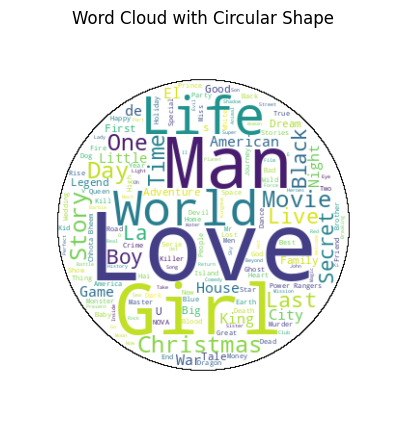

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from wordcloud import WordCloud

# Create an empty white image
width, height = 400, 400
image = Image.new('L', (width, height), 255)

# Draw a black circle as the mask
draw = ImageDraw.Draw(image)
draw.ellipse((50, 50, width-50, height-50), fill=0)

# Convert to NumPy array
mask = np.array(image)

# Generate the word cloud with the mask
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mask, contour_width=1, contour_color='black').generate(' '.join(content_df['title']))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud with Circular Shape')
plt.show()

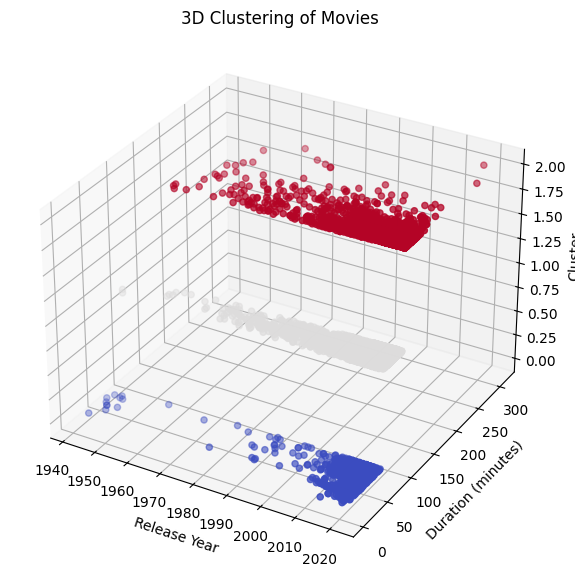

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(movies_filtered['release_year'], movies_filtered['duration'], movies_filtered['cluster'], c=movies_filtered['cluster'], cmap='coolwarm')
ax.set_xlabel('Release Year')
ax.set_ylabel('Duration (minutes)')
ax.set_zlabel('Cluster')
ax.set_title('3D Clustering of Movies')

plt.show()


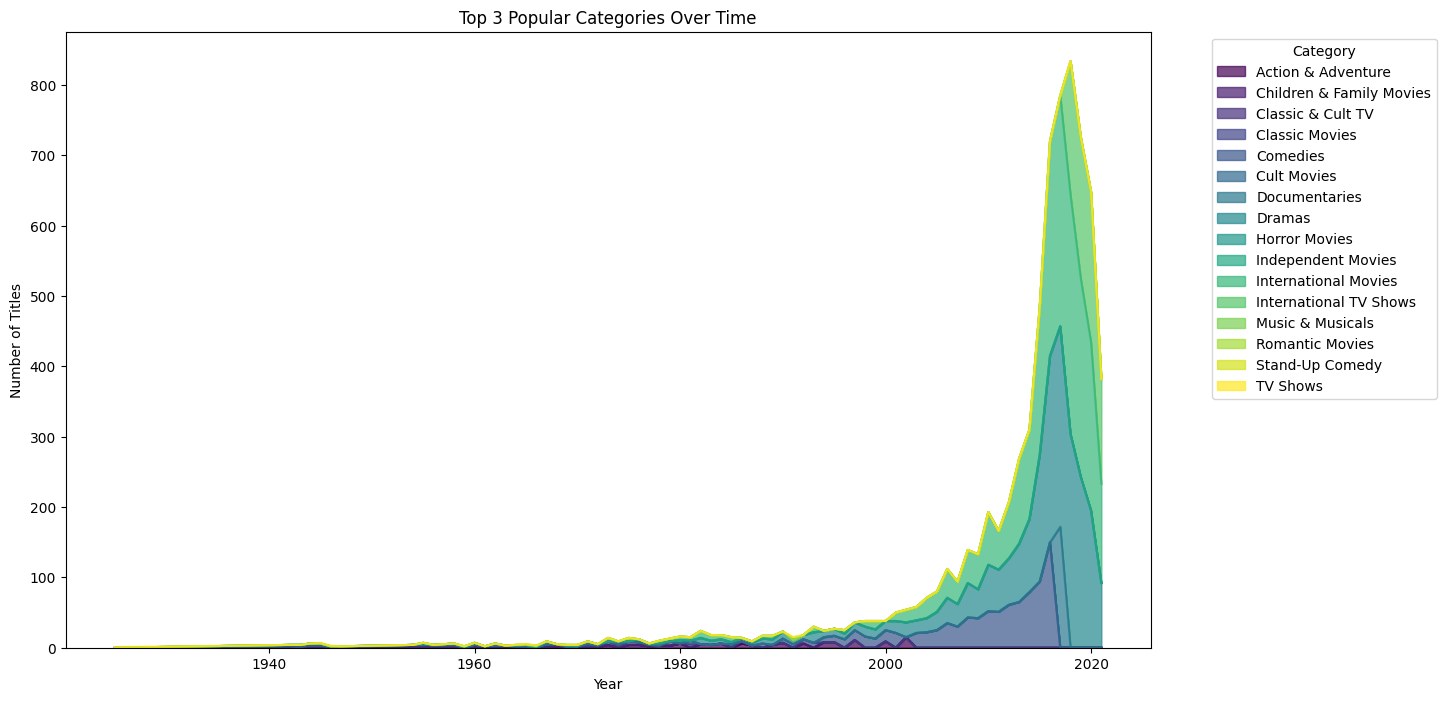

In [47]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Create the area plot with explicit axis
top_pivot.plot(kind='area', stacked=True, colormap='viridis', alpha=0.7, ax=ax)

# Add title and labels
ax.set_title('Top 3 Popular Categories Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Titles')

# Move legend outside the plot
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()
